<a href="https://colab.research.google.com/github/AzizJohn/DataScience/blob/main/D_S_S_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai==2.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 189 kB 15.3 MB/s 
     |████████████████████████████████| 55 kB 4.9 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:41tcmalloc: large alloc 1147494400 bytes == 0x3a3f8000 @  0x7fb90bb48615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 881.9 MB 1.9 kB/s 
     |████████████████████████████████| 24.3 MB 1.2 MB/s 
     |████████████████████████████████| 19.1 MB 1.2 MB/s 
     |████████████████████████████████| 19.1 MB 1.2 MB/s 
     |████████████████████████████████| 21.0 MB 1.2 MB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
  Attempting uninstall: torc

In [ ]:
# kutubxonalarni yuklab olish
import torch
import fastai

# versiyalarni tekshirish
print(torch.__version__)
print(fastai.__version__)

1.10.2+cu102
2.5.3


In [ ]:
!git clone https://github.com/EscVM/OIDv4_Toolkit.git
!cd OIDv4_Toolkit && pip install -r requirements.txt

Cloning into 'OIDv4_Toolkit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 21.01 MiB/s, done.
Resolving deltas: 100% (146/146), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.9 MB 16.0 MB/s 
     |████████████████████████████████| 9.9 MB 58.3 MB/s 
     |████████████████████████████████| 79 kB 9.4 MB/s 
     |████████████████████████████████| 548 kB 68.6 MB/s 
     |████████████████████████████████| 636 kB 68.5 MB/s 
     |████████████████████████████████| 140 kB 57.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninst

In [ ]:
!cd OIDv4_Toolkit && python main.py -h

usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine generated h or m)]
               [--image_IsOccluded 1 or 0] [--image_IsTruncated 1 or 0]
               [--image_IsGroupOf 1 or 0] [--image_IsDepiction 1 or 0]
               [--image_IsInside 1 or 0] [--multiclasses 0 (default or 1]
               [--n_threads [default 20]] [--noLabels]
               [--limit integer number]
               <command> 'downloader', 'visualizer' or 'ill_downloader'.

Open Image Dataset Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
                        'downloader', 'visualizer' or 'ill_downloader'.

optional arguments:
  -h, --help            show this help message and exit
  --Dataset /path/to/OID/csv/
                        Directory of the OID da

In [ ]:
!cd OIDv4_Toolkit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 52550 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

## Model

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

# path
path=Path('train')
#fls=get_image_files(path)
#fls
# failed=verify_images(path)

# Datablock yaratamiz
transports=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

# Dataloader yaratamiz
dls=transports.dataloaders(path)

# datasetni tekshirish
# dls.train.show_batch(max_n=32, nrows=4)

# O'qitish (train)
learn=cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.377281,0.280442,0.925000,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.377408,0.219660,0.925000,00:11
1,0.282676,0.294213,0.916667,00:11
2,0.201281,0.302104,0.916667,00:13
3,0.159470,0.283777,0.916667,00:11


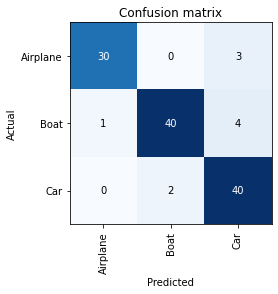

In [ ]:
# tekshirish
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

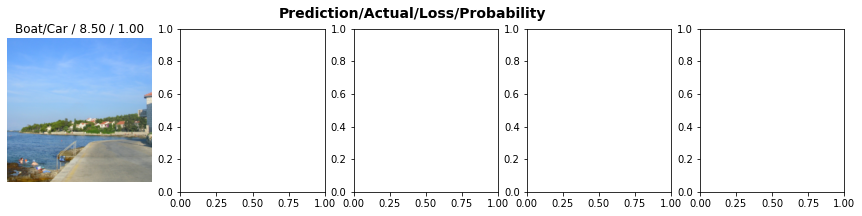

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat: Airplane
Ehtimollik: 100.0%


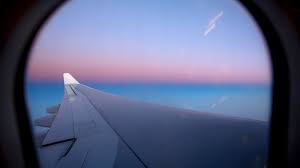

In [ ]:
img=PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f'Bashorat: {pred}')
print(f'Ehtimollik: {probs[pred_id]*100:.1f}%')
img

O'qitilgan modelni saqlab olish

In [ ]:
learn.export('transport_model.pkl')

## O'qitilgan modelni yuklab olib tekshirib ko'ramiz

In [ ]:
model=load_learner("/content/transport_model.pkl")
model.predict(img)

('Airplane', TensorBase(0), TensorBase([1.0000e+00, 1.7207e-06, 2.0548e-06]))